In [31]:
import requests
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import yfinance as yf

In [32]:
#Sentiment
ticker = 'TSLA'
url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&apikey=CEN1NMZCENKRX5KS'

r = requests.get(url)
data = r.json()

print(json.dumps(data, indent = 4))

{
    "items": "50",
    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish",
    "relevance_score_definition": "0 < x <= 1, with a higher score indicating higher relevance.",
    "feed": [
        {
            "title": "Musk Expected To Visit China This Week, Meet Officials: Report - Tesla  ( NASDAQ:TSLA ) ",
            "url": "https://www.benzinga.com/news/23/05/32616063/musk-expected-to-visit-china-this-week-meet-officials-report",
            "time_published": "20230529T183356",
            "authors": [
                "Bibhu Pattnaik"
            ],
            "summary": "Tesla Inc TSLA CEO Elon Musk is expected to visit China this week. According to Reuters, Musk will meet with officials and visit the Tesla plant in Shanghai. Earlier in May, Austin, Texas-based Tesla increased the price of specific models in China.",
            "banner_image": "https://cdn.

In [33]:
style.use('ggplot')

In [34]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2023,5,12)

In [35]:
stocks = ['AAPL', 'TSLA', 'AMZN', 'GOOGL' ]
price = yf.download(stocks, start = start, end = end )
print(price.head(1000))

[*********************100%***********************]  4 of 4 completed
             Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        TSLA        AAPL   
Date                                                                     
2018-01-02   40.831593   59.450500   53.660500   21.368668   43.064999   
2018-01-03   40.824463   60.209999   54.576000   21.150000   43.057499   
2018-01-04   41.014103   60.479500   54.787998   20.974667   43.257500   
2018-01-05   41.481068   61.457001   55.514500   21.105333   43.750000   
2018-01-08   41.326996   62.343498   55.710499   22.427334   43.587502   
...                ...         ...         ...         ...         ...   
2021-12-14  172.820786  169.091507  143.906998  319.503326  174.330002   
2021-12-15  177.747742  173.315002  146.440994  325.329987  179.300003   
2021-12-16  170.768692  168.871002  144.445007  308.973328  172.259995   
2021-12-17  169.658401  170.017502  141.725

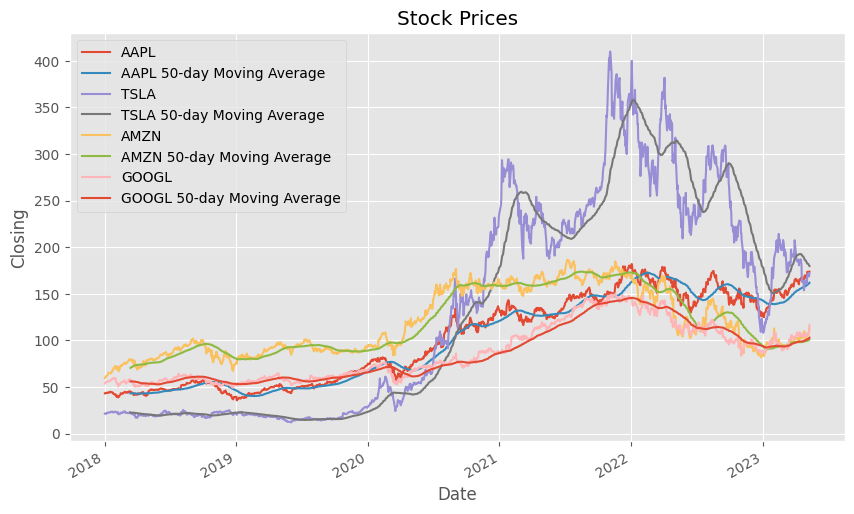

In [36]:
fig, ax = plt.subplots(figsize =(10,6))
plt.grid(True)

for stock in stocks:
    price['Close'][stock].plot(label = stock)
    price['Close'][stock].rolling(window=50).mean().plot(label = f'{stock} 50-day Moving Average')


plt.title("Stock Prices")
plt.xlabel('Date')
plt.ylabel('Closing')
plt.legend()
plt.show()